Credit cs231n.stanford.edu

## Base Functions 
The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

<h2 align="center">BackProp and Optimizers</h2>
<img src="img/bp.png" width="600">

In [1]:
import numpy as np
from scipy.optimize import check_grad
from gradient_check import eval_numerical_gradient_array

def rel_error(x, y):
      return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

<h3>Grad Check</h3>

<img src="img/gc.png" width="600">

<h3>Softmax Loss Layer</h3>
<img src="./img/loss.png" width="300">
<img src="./img/log.png" width="600">

In [2]:
 def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    L_i = np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)
#     print('L_i', L_i)
    loss = np.mean(-np.log([L_i[i, y[i]] for i in range(len(y))]))
#     print('loss',loss)
    """∂Li/∂fj= Li_j−1 (if j = y_i)
                L_i_j  (if j != y_i)
    ∂L/∂fj = 1/N * ∂Li/∂fj           
    """    
    dx = L_i
    dx[range(len(y)),y] -= 1
    dx /= len(y)
    
#     loss  = lambda x: rel_error(np.mean(np.exp(x) / np.sum(np.exp(x)), axis=1), y)
#     dx = eval_numerical_gradient_array(loss, x, 1)
#     print(dx)
#     return loss, dx
#     return loss
    return loss, dx

In [3]:
y = np.random.randint(0, 3, 10)
dx = lambda x: softmax_loss(x.reshape((10, 3)), y)[1].reshape(-1)
# print(np.shape(dx))
loss = lambda x: softmax_loss(x.reshape((10, 3)), y)[0]

In [4]:
print('loss is a scalar\n', loss(np.random.random((10, 3))))

loss is a scalar
 1.12523668114


In [5]:
print('gradient is a matrix with shape 10x3\n', dx(np.random.random((10, 3))).reshape((10,3)))

gradient is a matrix with shape 10x3
 [[ 0.02975702 -0.05510638  0.02534936]
 [ 0.04707922  0.0283709  -0.07545012]
 [ 0.03308504  0.03891291 -0.07199795]
 [ 0.041414   -0.07245492  0.03104093]
 [ 0.02836072  0.03694576 -0.06530648]
 [ 0.036536   -0.08031961  0.04378361]
 [ 0.02630774  0.02663515 -0.05294289]
 [ 0.03254231 -0.06403329  0.03149098]
 [-0.07095069  0.03946409  0.03148659]
 [ 0.02138458  0.04282005 -0.06420463]]


In [6]:
print('difference should be ~10e-8', check_grad(loss, dx, np.random.random((10, 3)).reshape(-1)))

difference should be ~10e-8 3.63268948258e-08


<h3>Dense Layer</h3>
<img src="img/lin.png" width="300">

In [7]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    #############################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You     #
    # will need to reshape the input into rows. 
    x = x.reshape(x.shape[0], -1)
    out = np.matmul(x, w) + b
    #############################################################################
    pass
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache

In [8]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)
# print('x', x)
# print('w', w)
# print('b', b)
out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.76985004799e-10


In [9]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
#     dx, dw, db = None, None, None
    dx = np.dot(dout, w.T)
    dw = np.dot(x.T, dout) 
    db = np.sum(dout, axis=0)
#     print('db', db)
    #############################################################################
    # TODO: Implement the affine backward pass.                                 #
    #############################################################################
    pass
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db

In [10]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)
# print(affine_forward(x, w, b)[0])
dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x.reshape((x.shape[0], -1)), dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  1.8725214002e-10
dw error:  2.49366615636e-11
db error:  1.05830935702e-11


<h3>ReLu Layer</h3>

$$ReLu(x) = max(0, x)$$

In [11]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
#     out = None
    out = np.maximum(x, 0)
    #############################################################################
    # TODO: Implement the ReLU forward pass.                                    #
    #############################################################################
    pass
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = x
    return out, cache

In [12]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
print(out)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.04545455  0.13636364]
 [ 0.22727273  0.31818182  0.40909091  0.5       ]]
Testing relu_forward function:
difference:  4.99999979802e-08


In [13]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    dx = dout* (x > 0)
    #############################################################################
    # TODO: Implement the ReLU backward pass.                                   #
    #############################################################################
    pass
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx

In [14]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756180686e-12


<h3>Two Layer Fully Connected Neural Net with SGD</h3>

In [15]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%pylab inline

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(y_test)

data_max = np.max(X_train)
# print('Xtest1', X_test)
X_train = X_train/data_max 
X_test = X_test/data_max 

Populating the interactive namespace from numpy and matplotlib
[6 6 2 7 9 5 3 9 0 1 8 1 9 6 7 9 4 8 7 2 0 3 6 7 2 0 8 0 9 7 7 3 6 5 9 9 6
 9 2 2 3 5 7 2 2 8 8 6 9 3 8 3 6 3 2 3 4 7 3 0 2 6 9 0 0 8 8 7 6 5 5 9 1 1
 8 0 3 9 3 6 8 4 8 6 0 1 1 3 5 1 0 4 3 4 2 7 6 0 7 8 2 1 7 9 8 3 4 9 9 5 4
 2 7 2 3 3 7 0 9 2 3 7 7 5 4 9 5 9 9 2 7 4 3 7 9 2 4 0 2 4 9 1 7 4 0 1 5 4
 0 6 3 2 7 3 7 6 2 5 2 8 4 9 7 9 3 1 9 2 8 5 6 1 0 4 8 1 9 6 1 6 5 7 7 9 4
 4 6 5 5 8 7 0 0 3 3 1 3 0 2 4 7 2 3 4 3 0 1 8 5 2 4 8 3 4 7 8 3 4 5 6 1 5
 8 7 2 8 6 5 4 1 5 8 1 3 8 7 5 2 3 1 0 2 2 6 0 2 2 3 5 3 7 1 8 2 6 1 4 3 8
 3 5 6 2 0 6 1 2 8 7 5 8 8 7 8 3 8 5 6 5 3 4 2 0 4 4 9 1 1 3 3 9 6 9 8 6 8
 6 6 1 8 9 0 3 3 4 6 4 5 0 9 8 1 1 4 2 0 1 3 2 8 8 9 3 5 6 0 9 2 5 6 3 9 4
 7 0 5 2 6 5 9 3 0 1 1 6 8 0 2 9 4 2 2 0 0 5 2 1 4 1 5 1 2 1 3 7 3 9 8 2 8
 4 9 4 7 5 5 9 4 7 5 2 0 9 7 6 8 6 3 3 1 7 5 2 6 7 8 7 3 5 0 8 0 4 0 1 2 0
 7 6 9 5 8 1 2 5 7 6 9 0 6 3 1 2 0 3 5 3 3 5 6 2 2 3 0 8 9 0 8 8 9 2 5 9 5
 4 3 9 1 8 9 0 0 4 3 9 5 1 9 8 5 0 3 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


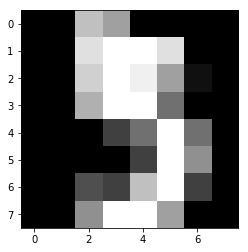

In [16]:
pylab.imshow(X[5].reshape((8, 8)), cmap='gray')

In [18]:
W1, b1 = np.random.uniform(-1, 1, (64, 100)), np.random.random(100)
W2, b2 = np.random.uniform(-1,1,(100, 10)), np.random.random(10)

lr = 1e-3
# print('Xtest2', X_test)
for i in range(50000):
    batch_index = np.random.randint(0, X_train.shape[0], 100)
    batch_X, batch_y = X_train[batch_index], y_train[batch_index]
#     print('w1', W1)
#     print('batch_X', batch_X)
#     print('sum 1 row X', np.sum(batch_X[1]))
    # ------------ Train ----------------- 
    # Forward Pass
    out1, cache1 = affine_forward(batch_X, W1, b1) # Dense Layer
#     print('out1', out1)
    out2, cache2 = relu_forward(out1)              # ReLu Layer
#     print('out2', out2)
    out3, cache3 = affine_forward(out2,    W2, b2) # Dense Layer
#     print('out3', out3)
    tr_loss, dx = softmax_loss(out3, batch_y)      # Loss Layer 
#     print('tr_loss', tr_loss)
#     print('dx', dx)
    # Backward Pass
    dx2, dw2, db2 = affine_backward(dx, cache3)
#     print('dx2', dx2)
    dx12 = relu_backward(dx2, cache2)
#     print('dx2.shape', dx2.shape, dx2)
#     dx12 = relu_backward(out2, cache2)
#     print('dx12.shape',dx12.shape)
#     print('dx12', dx12)
    dx1, dw1, db1 = affine_backward(dx12, cache1)
#     dx1, dw1, db1 = affine_backward(out1, cache1)
#     print('dw1.shape', dw1.shape)
#     print('dw1', dw1)
    # Updates
    W2 -= lr*dw2
    b2 -= lr*db2
    W1 -= lr*dw1
#     print('W1', W1)
    b1 -= lr*db1
#     print('b1', b1)
    # ------------ Test ----------------- 
    # Forward Pass
    out1, cache1 = affine_forward(X_test, W1, b1) # Dense Layer
#     print('Out1', out1)
    out2, cache2 = relu_forward(out1)              # ReLu Layer
    out3, cache3 = affine_forward(out2,    W2, b2) # Dense Layer 
#     print('out3', out3)
    te_loss, dx = softmax_loss(out3, y_test)      # Loss Layer
#     te_loss = softmax_loss(out3, y_test)[0]
    # Predict
#     y_pred = ...
    y_pred = np.argmax(out3, axis=1)
#     print(y_pred.shape)
    if i % 1000 == 0:
        print('epoch %s:' % i) 
        print('\t tr_loss %.2f' % tr_loss)
        print('\t te_loss %.2f' % te_loss)
        print('\t te_acc %s' % accuracy_score(y_pred, y_test))

epoch 0:
	 tr_loss 13.47
	 te_loss 12.06
	 te_acc 0.0648148148148
epoch 1000:
	 tr_loss 2.12
	 te_loss 2.11
	 te_acc 0.468518518519
epoch 2000:
	 tr_loss 1.00
	 te_loss 1.10
	 te_acc 0.703703703704
epoch 3000:
	 tr_loss 0.71
	 te_loss 0.78
	 te_acc 0.790740740741
epoch 4000:
	 tr_loss 0.48
	 te_loss 0.61
	 te_acc 0.827777777778
epoch 5000:
	 tr_loss 0.79
	 te_loss 0.51
	 te_acc 0.851851851852
epoch 6000:
	 tr_loss 0.26
	 te_loss 0.44
	 te_acc 0.874074074074
epoch 7000:
	 tr_loss 0.46
	 te_loss 0.39
	 te_acc 0.885185185185
epoch 8000:
	 tr_loss 0.24
	 te_loss 0.36
	 te_acc 0.896296296296
epoch 9000:
	 tr_loss 0.09
	 te_loss 0.33
	 te_acc 0.901851851852
epoch 10000:
	 tr_loss 0.30
	 te_loss 0.31
	 te_acc 0.911111111111
epoch 11000:
	 tr_loss 0.21
	 te_loss 0.29
	 te_acc 0.912962962963
epoch 12000:
	 tr_loss 0.21
	 te_loss 0.27
	 te_acc 0.916666666667
epoch 13000:
	 tr_loss 0.20
	 te_loss 0.26
	 te_acc 0.922222222222
epoch 14000:
	 tr_loss 0.11
	 te_loss 0.25
	 te_acc 0.925925925926
epoch